In [3]:
import numpy as np
import pandas as pd
import os
import pickle
import networkx as nx
from scipy.stats import expon, uniform, beta
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time
from joblib import cpu_count

os.chdir("/Users/amkagan/Desktop/gltm_experiments")

from InfluenceDiffusion.estimation_models.OptimEstimation import GLTWeightEstimator
from InfluenceDiffusion.estimation_models.EMEstimation import LTWeightEstimatorEM
from InfluenceDiffusion.influence_models import LTM
from InfluenceDiffusion.Graph import Graph
from InfluenceDiffusion.weight_samplers import make_random_weights_with_indeg_constraint, \
                                               make_weighted_cascade_weights

from utils.trace_utils import make_report_traces
from utils.model_evaluation_utils import plot_estimator_output_vs_variable
from utils.utils import RMAE, make_name_from_dict
from utils.model_evaluation_utils import run_experiment


print("CPUs available", cpu_count())

CPUs available 8


## Make graph

In [8]:
p_range = [0.05, 0.1, 0.2, 0.4]
max_seed_size = 5
n_traces = 2000
random_state = 2

num_runs_per_trace = 5
error_metric = RMAE

seed_size_range = range(1, max_seed_size + 1)

# sns.heatmap(g.get_adj_matrix())
# plt.show()

## Compare EM vs Convex Optimization

In [9]:
n_nodes = 100

save_dict = {"n_nodes": n_nodes, 
             "n_traces": n_traces,
             "max_seed_size": max_seed_size, 
             "n_trace_sets_per_graph": num_runs_per_trace,
             "max_p": max(p_range), 
             "random_state": random_state}

save_name = make_name_from_dict(save_dict)

In [ ]:
p_2_output_over_models_nodes_100 = {}

np.random.seed(random_state)

for idx, p in enumerate(p_range):
    print()
    print(f"Start working on ER graph with p={p}")
    

    g_nx = nx.erdos_renyi_graph(n_nodes, p=p, seed=idx, directed=True)
    g = Graph(g_nx.edges)

    true_weights = make_random_weights_with_indeg_constraint(g, indeg_ub=1)

    g.set_weights(true_weights)
    ltm = LTM(g)
    
    EM_estimator = LTWeightEstimatorEM(g)
    Opt_estimator = GLTWeightEstimator(g)
    init_weights = make_weighted_cascade_weights(g)
    EM_fit_kwargs = {"max_iter": 100, "tol": 1e-7, "verbose": False}
    Opt_fit_kwargs = {"init_weights": init_weights, "verbose": False}

    p_2_output_over_models_nodes_100[p] = run_experiment(
        g, 
        influence_model=ltm, 
        estimating_models_dict={"LT-EM (n=100)": EM_estimator, "LT-Opt (n=100)": Opt_estimator},
        n_simulations=num_runs_per_trace, 
        n_traces=n_traces, seed_size_range=seed_size_range, 
        fit_kwargs={"LT-EM (n=100)": EM_fit_kwargs, "LT-Opt (n=100)": Opt_fit_kwargs})

with open(f"saved_results/em_vs_opt_vary_p_{save_name}.pkl", "wb") as f:
    pickle.dump(p_2_output_over_models_nodes_100, f, protocol=pickle.HIGHEST_PROTOCOL)


Start working on ER graph with p=0.05


100%|█████████████████████████████████████████████| 5/5 [00:29<00:00,  5.85s/it]



Start working on ER graph with p=0.1


100%|█████████████████████████████████████████████| 5/5 [01:01<00:00, 12.31s/it]



Start working on ER graph with p=0.2


100%|█████████████████████████████████████████████| 5/5 [02:26<00:00, 29.35s/it]



Start working on ER graph with p=0.4


 20%|████████▏                                | 1/5 [24:14<1:36:57, 1454.27s/it]

In [4]:
with open(f"saved_results/em_vs_opt_vary_p_{save_name}.pkl", "rb") as f:
    p_2_output_over_models_nodes_100 = pickle.load(f)

In [6]:
# plt.figure(figsize=(10, 6))
# plot_estimator_output_vs_variable(p_2_output_over_models_nodes_100, 
#                                   output_key="times",
#                                   xlabel="ER prob",
#                                   ylabel="Work time (s)",
#                                   n_std=1)

# plt.show()


In [5]:
n_nodes = 200

save_dict = {"n_nodes": n_nodes, 
             "n_traces": n_traces,
             "max_seed_size": max_seed_size, 
             "n_trace_sets_per_graph": num_runs_per_trace,
             "max_p": max(p_range), 
             "random_state": random_state}

save_name = make_name_from_dict(save_dict)

In [ ]:
p_2_output_over_models_nodes_200 = {}

np.random.seed(random_state)

for p in p_range:
    print()
    print(f"Start working on ER graph with p={p}")
    

    g = make_erdos_renyi_graph(n_nodes, p=p, 
                               directed=True, loops_allowed=False)

    true_weights = make_random_weights_with_indeg_constraint(g, indeg_ub=1)

    g.set_weights(true_weights)
    ltm = LTM(g)
    
    EM_estimator = LTWeightEstimatorEM(g)
    Opt_estimator = GLTWeightEstimator(g)
    init_weights = make_weighted_cascade_weights(g)
    EM_fit_kwargs = {"max_iter": 100, "tol": 1e-7, "verbose": False}
    Opt_fit_kwargs = {"init_weights": init_weights, "verbose": False}

    p_2_output_over_models_nodes_200[p] = run_experiment(
        g, 
        influence_model=ltm, 
        estimating_models_dict={"LT-EM (n=200)": EM_estimator, "LT-Opt (n=200)": Opt_estimator},
        n_simulations=num_runs_per_trace, 
        n_traces=n_traces, seed_size_range=seed_size_range, 
        fit_kwargs={"LT-EM (n=200)": EM_fit_kwargs, "LT-Opt (n=200)": Opt_fit_kwargs})

    with open(f"saved_results/em_vs_opt_vary_p_{save_name}.pkl", "wb") as f:
        pickle.dump(p_2_output_over_models_nodes_200, f, protocol=pickle.HIGHEST_PROTOCOL)


Start working on ER graph with p=0.05


100%|██████████| 5/5 [02:49<00:00, 33.82s/it]



Start working on ER graph with p=0.1


100%|██████████| 5/5 [05:24<00:00, 64.84s/it]



Start working on ER graph with p=0.2


100%|██████████| 5/5 [10:58<00:00, 131.65s/it]



Start working on ER graph with p=0.4


100%|██████████| 5/5 [25:17<00:00, 303.47s/it]



Start working on ER graph with p=0.8


 80%|████████  | 4/5 [55:26<13:53, 833.16s/it]

In [5]:
with open(f"saved_results/em_vs_opt_vary_p_{save_name}.pkl", "rb") as f:
    p_2_output_over_models_nodes_200 = pickle.load(f)

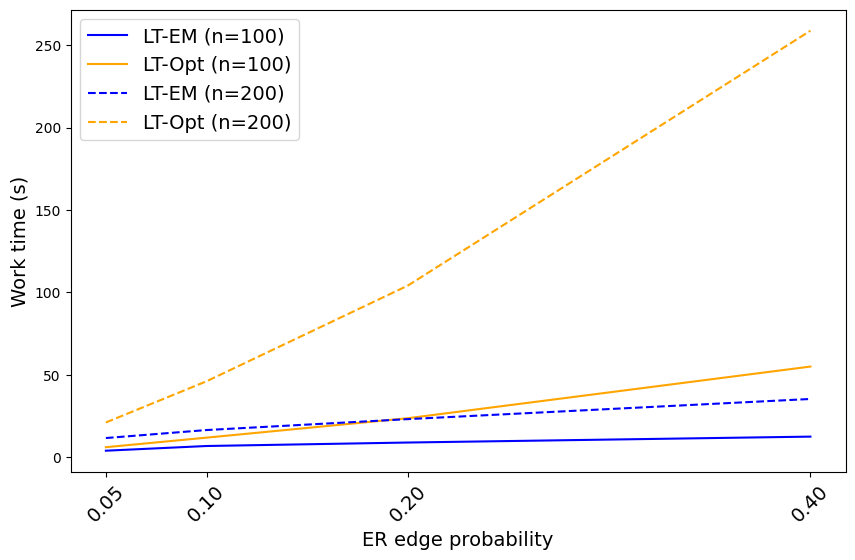

In [22]:
plt.figure(figsize=(10, 6))
plot_estimator_output_vs_variable(dict(list(p_2_output_over_models_nodes_100.items())[:-1]), 
                                  colors=["blue", "orange"],
                                  linestyles=["-", "-"],
                                  output_key="times",
                                  xlabel="ER edge probability",
                                  ylabel="Work time (s)",
                                  n_std=0)

plot_estimator_output_vs_variable(dict(list(p_2_output_over_models_nodes_200.items())[:-1]), 
                                  colors=["blue", "orange"],
                                  linestyles=["--", "--"],
                                  output_key="times",
                                  xlabel="ER edge probability",
                                  ylabel="Work time (s)",
                                  n_std=0)

plt.savefig("figures/em_opt_compar_prob.png", dpi=150, bbox_inches="tight")

plt.show()
